In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

# Data Reading

In [24]:
df =  pd.read_csv("data_D.csv")

df.head(5)

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


# Data Preprocessing

## a. Null Value Checking + Filling

In [25]:
df.isnull().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [26]:
df["CreditScore"].dtype

dtype('float64')

*   For column `CreditScore`, we are going to fill in null values as such that if the data is distributed normally, replace null with mean, but if its is skewed replace with median

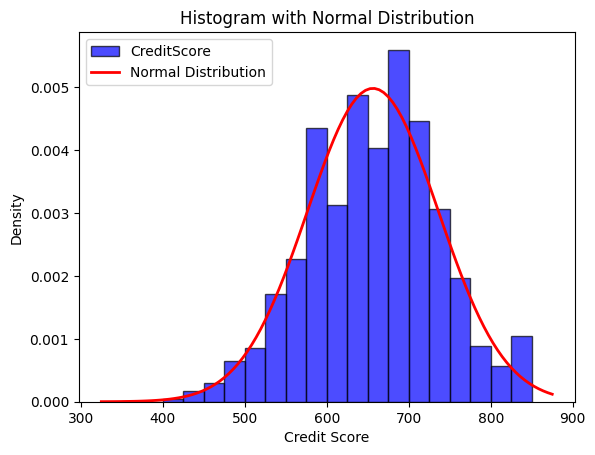

In [27]:
from scipy.stats import norm

plt.hist(df['CreditScore'], bins=20, density=True, color='blue', edgecolor='black', alpha=0.7, label='CreditScore')

mu, sigma = df['CreditScore'].mean(), df['CreditScore'].std()

# getting normal distribution line plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution')  # Change color to red (r)

plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Histogram with Normal Distribution')
plt.legend()

plt.show()

We will be filing in the null values with the mean

In [28]:
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace=True)

df.isnull().sum()

C:\Users\ROG ZEPHYRUS\AppData\Local\Temp\ipykernel_54552\3237022377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CreditScore'].fillna(df['CreditScore'].mean(), inplace=True)


Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

## b. Deleting unused variabels
we wont be using the variables `Unnamed`, `id`, `customerid`, and `surname` for this classification task.



In [29]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['CustomerId'], inplace=True)
df.drop(columns=['Surname'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


## c. Variable Encoding

### i. Geography

In [30]:
df['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [31]:
geography_mapping = {'France': 0, 'Germany': 1, 'Spain': 2}

df['Geography'] = df['Geography'].replace(geography_mapping)

C:\Users\ROG ZEPHYRUS\AppData\Local\Temp\ipykernel_54552\2544823602.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace(geography_mapping)


### ii. Gender

In [32]:
gender_mapping = {'Female': 0, 'Male': 1}

df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\ROG ZEPHYRUS\AppData\Local\Temp\ipykernel_54552\282906228.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,0,0,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,0,1,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,1,0,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,0,0,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,1,0,46.0,4,107720.57,1,0,0,93832.33,1


## d. About Each Variable
for app making

In [34]:
creditscore_max = df['CreditScore'].max()
age_max = df['Age'].max()
tenure_max = df['Tenure'].max()
balance_max = df['Balance'].max()
numofproducts_max = df['NumOfProducts'].max()
estimatedsalary_max = df['EstimatedSalary'].max()

print("CreditScore Max:", creditscore_max)
print("Age Max:", age_max)
print("Tenure Max:", tenure_max)
print("Balance Max:", balance_max)
print("NumOfProducts Max:", numofproducts_max)
print("EstimatedSalary Max:", estimatedsalary_max)

CreditScore Max: 850.0
Age Max: 92.0
Tenure Max: 10
Balance Max: 250898.09
NumOfProducts Max: 4
EstimatedSalary Max: 199992.48


# Train test split

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='churn', axis=1)
Y = df['churn']

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=32, test_size=0.2)

# Model Building

## a. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(n_estimators=30,
                               random_state=32)
RFmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=32)

In [37]:
y_pred = RFmodel.predict(x_test)

In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.853247697527872
Precision: 0.7186779400461184
Recall: 0.5252808988764045
F1 Score: 0.6069457968192146


## b. XGboost

In [39]:
import xgboost as xgb

XGmodel = xgb.XGBClassifier(tree_method="auto")

XGmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = XGmodel.predict(x_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8540959767329133
Precision: 0.7071942446043166
Recall: 0.552247191011236
F1 Score: 0.6201892744479496


# Final Model Selection

both of the models seem to work similarly, given the differences in each scores between both model. However, in churn prediction cases (whether or not customers came back to the to the business) it is important that we ensure high recall values, as false negatives may result to a profit loss in a business. False negatives in churn cases may lead to customer loss, given that the model fails to identify customers who are in reality is leaving the business, by classifying them to the not churning class.
> Hence, we are going to pick the model with a higher recall value, which is the `XGboost` model.

In [42]:
import pickle as pkl

filename = 'XGmodel_2602100120.pkl'
pkl.dump(XGmodel, open(filename, 'wb'))

In [152]:
pd.unique(df.values.ravel())


array([6.5200000e+02, 0.0000000e+00, 6.5000000e+01, ..., 1.3166533e+05,
       1.2180149e+05, 9.3882930e+04])